In [38]:
#Import libraries
import nltk # Natural Language Toolkit
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
import re # Regular Expression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [39]:
#Load Spam data
df = pd.read_csv('https://raw.githubusercontent.com/snehal-excelr/DS_Python/main/spam.csv',encoding='latin')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [40]:
#Rename columns
df.rename(columns={'v1':'class','v2':'text'},inplace=True)
df.head()

,class,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [41]:
#delete all Unnamed Columns
df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)

In [42]:
df['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

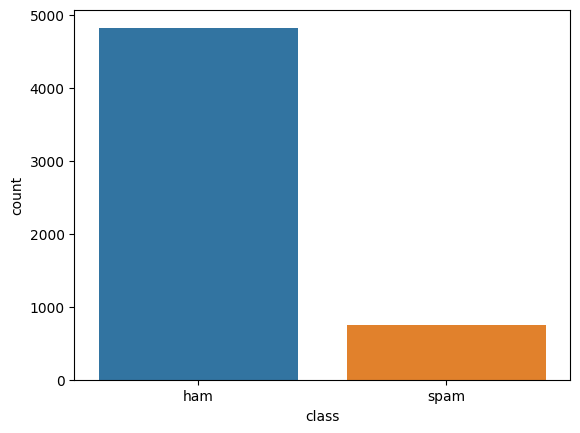

In [43]:
sns.countplot(x = df["class"])
#check how many times ham and spam is occuring

In [44]:
#replace ham with 0, spam with 1.
df['label']=df['class'].map({'spam':1,'ham':0})

In [45]:
#Create length column
df['length']=df['text'].apply(len)

In [46]:
df

,class,text,label,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


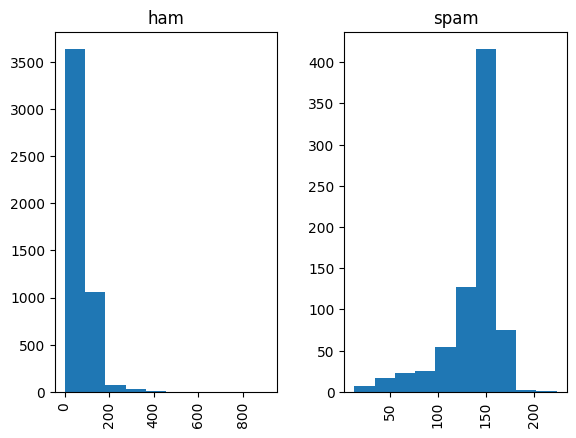

<Figure size 640x480 with 0 Axes>

In [47]:
df.hist(column='length',by='class')
plt.show()
plt.tight_layout()
#Check length of ham & spam

In [48]:
spam = df[df['label']==1]
ham = df[df['label']==0]
#Create separate dataframes for ham & spam

In [49]:
spam

,class,text,label,length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148
8,spam,WINNER!! As a valued network customer you have...,1,158
9,spam,Had your mobile 11 months or more? U R entitle...,1,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1,136
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1,90
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,160
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1,160
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1,147


In [50]:
ham

,class,text,label,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
6,ham,Even my brother is not like to speak with me. ...,0,77
...,...,...,...,...
5565,ham,Huh y lei...,0,12
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


In [51]:
#wordcloud

def wordcld(data,title): # pass dataset and what title you want for the wordcloud
  txt = ' '.join(data['text']) #join all sentences and convert it to paragraph
  txt = txt.lower() #normalization
  stop = STOPWORDS #stop will have entire list of stopwords

  wc = WordCloud(background_color='white',stopwords=stop).generate(txt)# inside generate()pass dataset for which you want to generate wordcloud
  plt.imshow(wc)
  plt.axis('off')# don't show numbers on x and y axis
  plt.title(title)

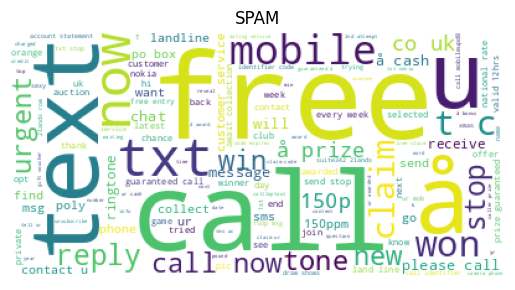

In [52]:
wordcld(spam,'SPAM')

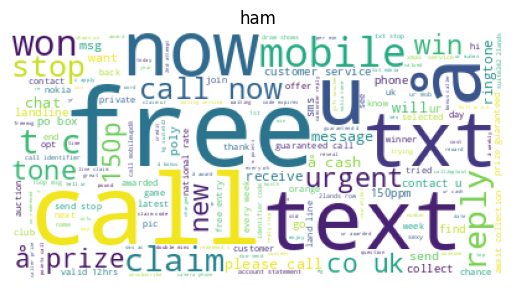

In [53]:
wordcld(spam,'ham')

In [54]:
lemma = WordNetLemmatizer()

In [55]:
# Data Cleaning - remove special characters, nos, emojis
# in model building consider only use text and label column
corpus = []

for i in range(len(df)):
  msg = re.sub('[^a-zA-Z]',' ',df['text'][i])
  msg = msg.lower()
  msg = msg.split() #separate each word from sentence when space is there

  msg = [lemma.lemmatize(i) for i in msg if not i in stopwords.words('english')]
  #Performed lemmatization & stopwords
  msg = ' '.join(msg)
  corpus.append(msg)

In [ ]:
corpus

In [57]:
#Import Feature Extraction & model building libraries
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ***Feature Extraction by bag of Words***

In [ ]:
cv = CountVectorizer()

x =  cv.fit_transform(corpus)
x = pd.DataFrame(x.toarray(),columns=cv.get_feature_names_out())
x

In [59]:
y = df['label'] # ham - 0, spam - 1
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [60]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

# ***Naive Bayes Algorithm***

In [61]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)
print(classification_report(ytest,ypred))
print(nb.score(xtrain,ytrain))
print(nb.score(xtest,ytest))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       976
           1       0.89      0.96      0.93       139

    accuracy                           0.98      1115
   macro avg       0.94      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115

0.9919228180390397
0.9811659192825112


# ***Feature Extraction by TF-IDF***

In [62]:
tf = TfidfVectorizer()
x_value =  tf.fit_transform(corpus)
x_value = pd.DataFrame(x_value.toarray(),columns=tf.get_feature_names_out())
x_value

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zed,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
xtrain,xtest,ytrain,ytest = train_test_split(x_value,y,test_size=0.2,random_state=1)

# ***Naive Bayes Algorithm***

In [64]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)
print(classification_report(ytest,ypred))
print(nb.score(xtrain,ytrain))
print(nb.score(xtest,ytest))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       976
           1       0.99      0.83      0.90       139

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.98      1115

0.9771146511106125
0.9775784753363229
